# Testing the PET-CT pipeline

Three components:
1. Patient dataset - Derived from torch.utils.data.Dataset
2. Patch queue - Custom queue + patch sampler based on TorchIO Queue source code
3. Patch loader - Regular instance of the torch.utils.data.DataLoader

In [1]:
import os, time

import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
import SimpleITK as sitk
from torch.utils.data import DataLoader
import torchio
from torchio.transforms import HistogramStandardization

import sys
sys.path.append('../')
from dataset_classes.HECKTORPETCTDataset import HECKTORPETCTDataset
from data_utils.preprocessing import Preprocessor
from data_utils.patch_sampling import PatchSampler, PatchQueue
from data_utils.visualization import NdimageVisualizer, display_image
from data_utils.conversion import *

If you use TorchIO for your research, please cite the following paper:
Pérez-García et al., TorchIO: a Python library for efficient loading,
preprocessing, augmentation and patch-based sampling of medical images
in deep learning. Credits instructions: https://torchio.readthedocs.io/#credits



In [2]:
data_dir = "/home/chinmay/Datasets/HECKTOR/hecktor_train/crFH_rs113_hecktor_nii"
patient_id_filepath = "../hecktor_meta/patient_IDs_train.txt"


viz = NdimageVisualizer()

## 1 Testing the dataset class

### 1.1 Separate volume representation

In [3]:
sample_idx = 0

preprocessor = Preprocessor()

PET_CT_dataset = HECKTORPETCTDataset(data_dir, 
                                     patient_id_filepath, 
                                     mode='train', 
                                     preprocessor=preprocessor,
                                     input_representation='separate volumes', 
                                     augment_data=False)

sample_dict = PET_CT_dataset[sample_idx]
print(sample_dict['PET'].shape)
print(sample_dict['PET'].min())
print(sample_dict['PET'].max())

# For visualization purpose
PET_np = sample_dict['PET'].squeeze().permute(2,1,0)
CT_np = sample_dict['CT'].squeeze().permute(2,1,0)
GTV_labelmap_np = sample_dict['GTV labelmap'].squeeze().permute(2,1,0)

torch.Size([1, 100, 450, 450])
tensor(0.)
tensor(20.)


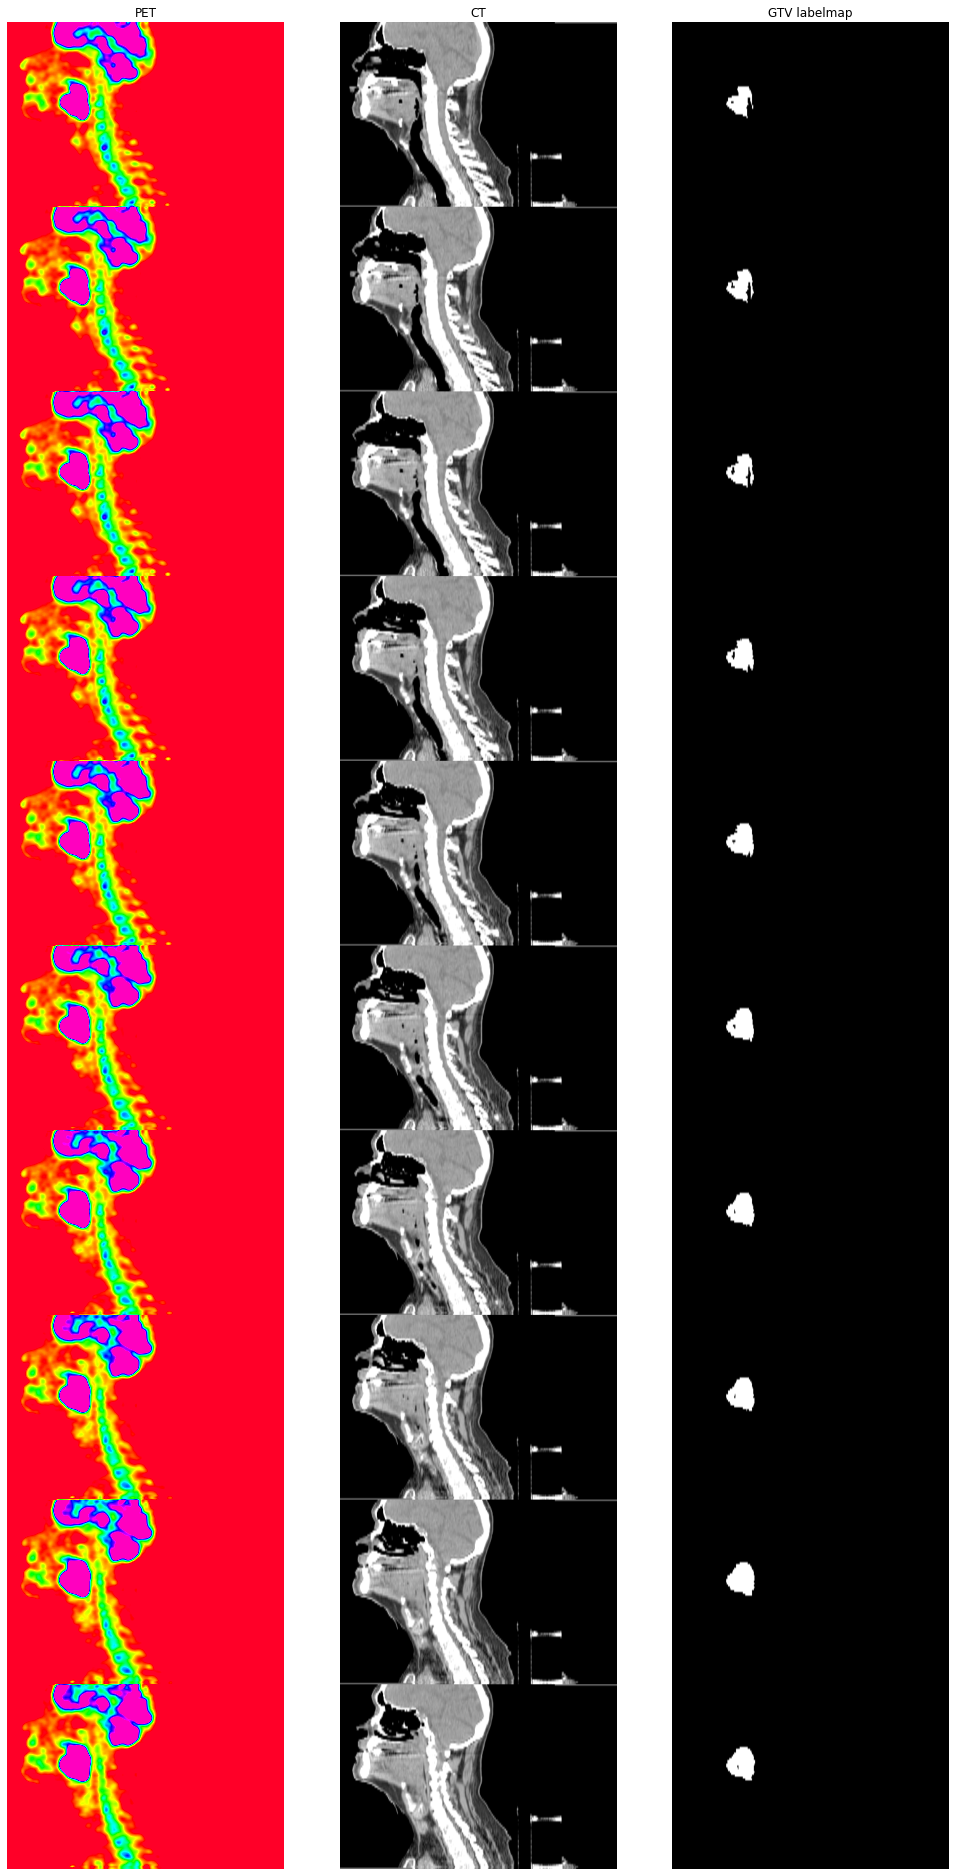

In [4]:
viz.multi_image_strips([PET_np, CT_np, GTV_labelmap_np],
                          modalities=['PET', 'CT', 'GTV labelmap'],
                          idx_range=[230, 240],
                          view='sagittal',
                          subtitles=[])

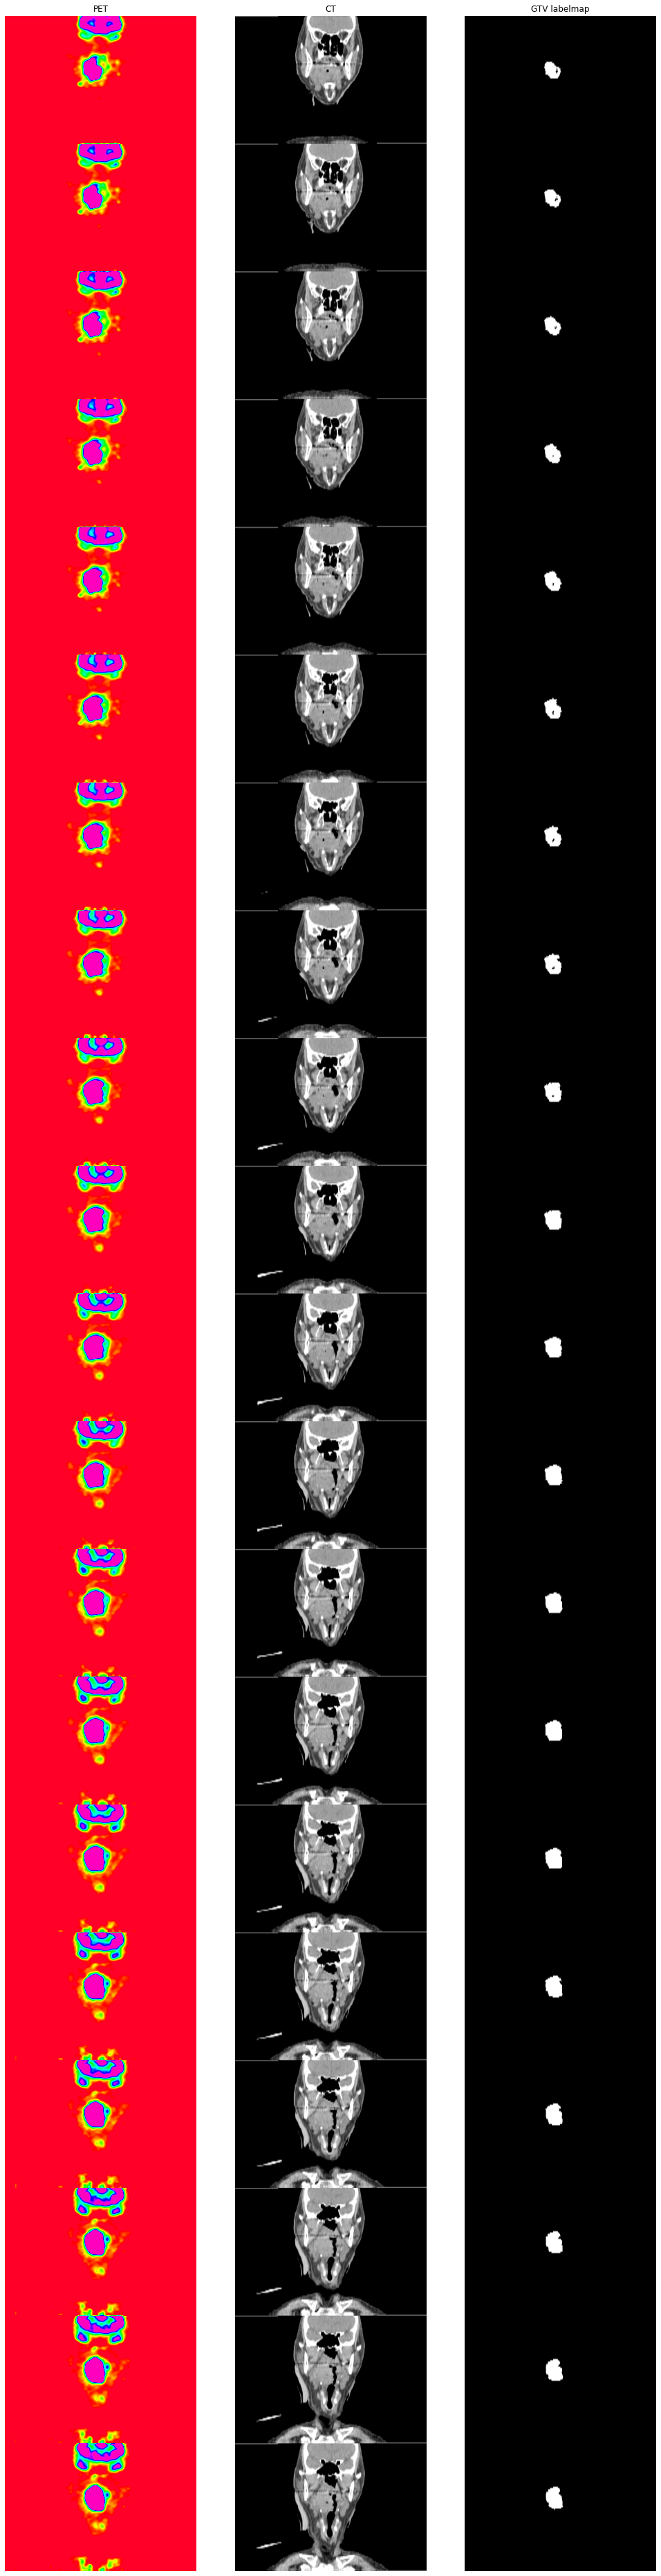

In [5]:
viz.multi_image_strips([PET_np, CT_np, GTV_labelmap_np],
                          modalities=['PET', 'CT', 'GTV labelmap'],
                          idx_range=[100, 120],
                          view='coronal',
                          subtitles=[])

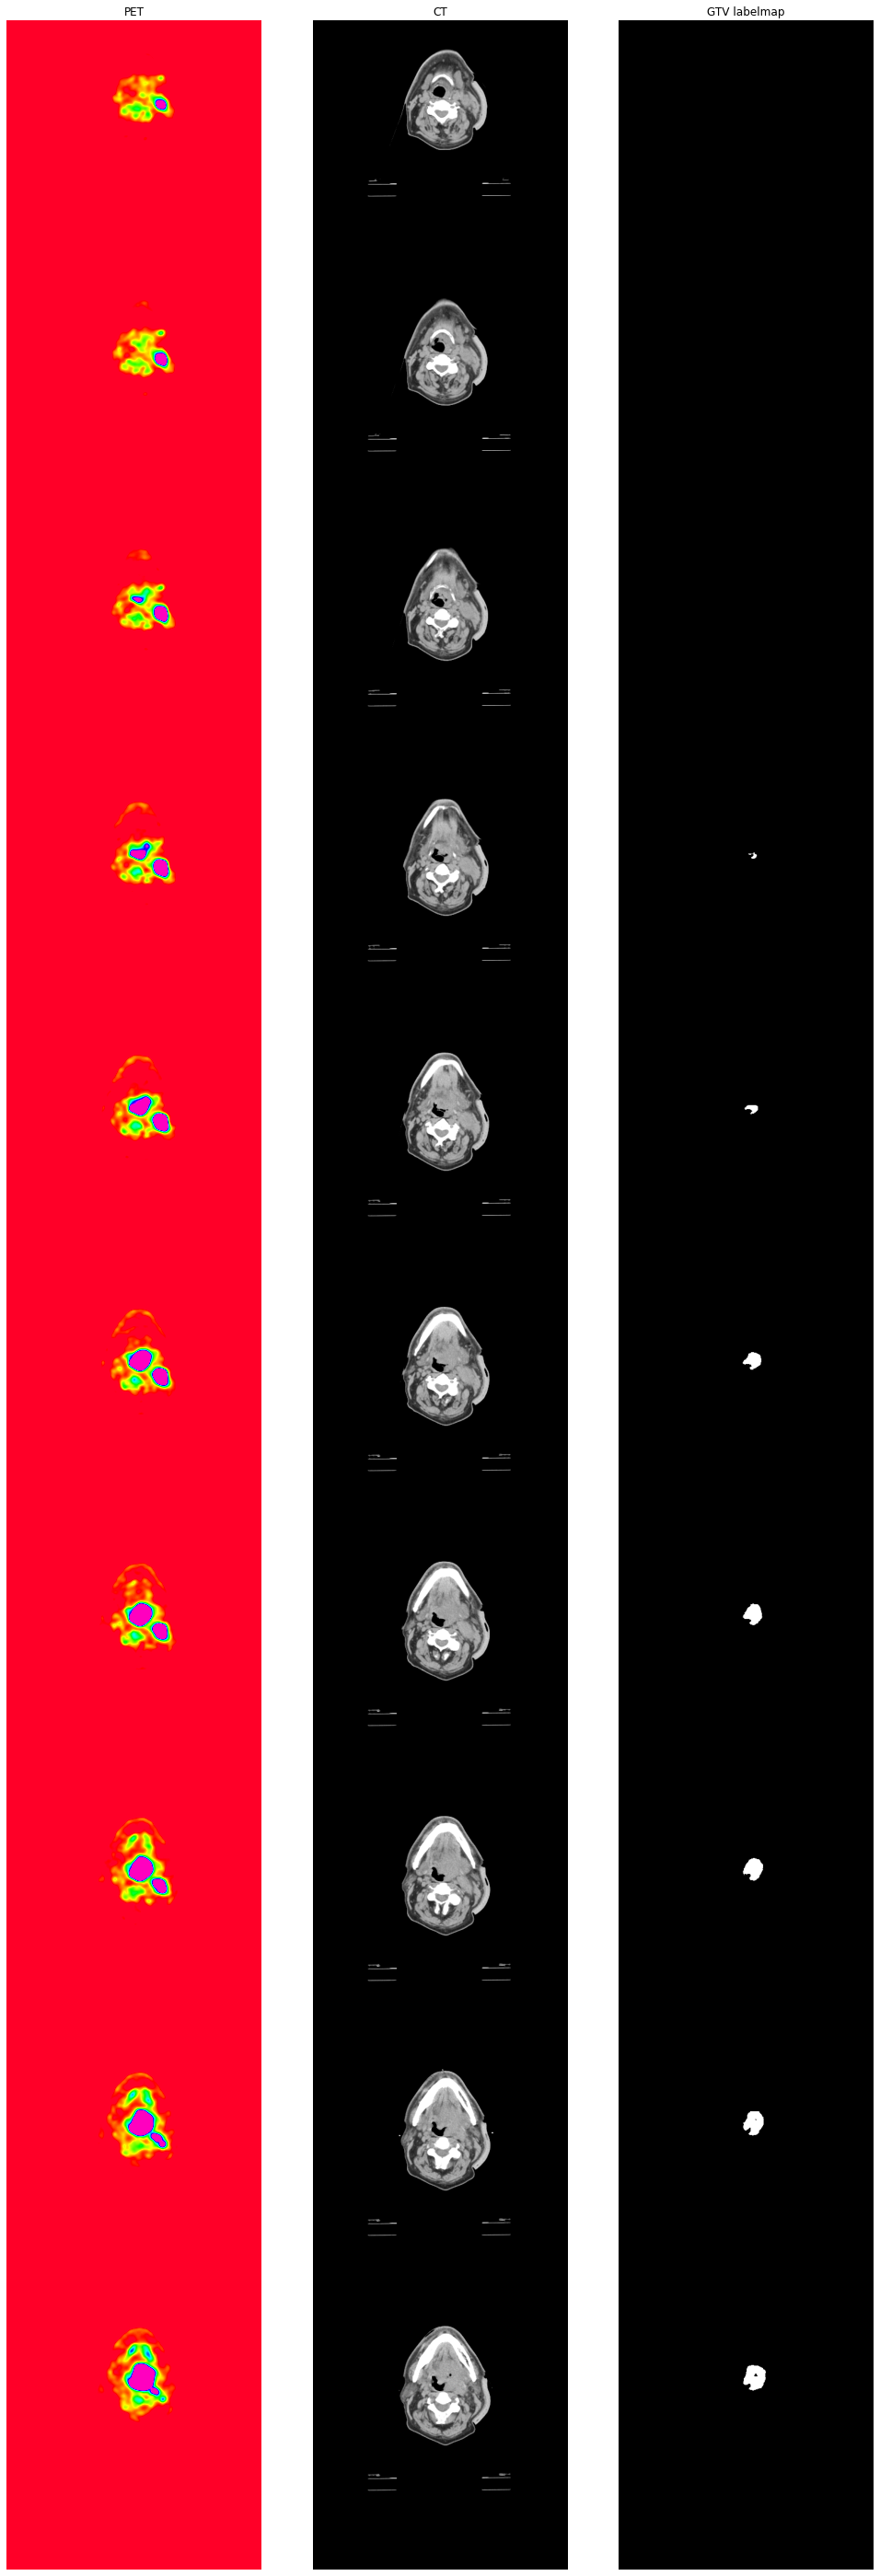

In [6]:
viz.multi_image_strips([PET_np, CT_np, GTV_labelmap_np],
                          modalities=['PET', 'CT', 'GTV labelmap'],
                          idx_range=[45, 55],
                          view='axial',
                          subtitles=[])

### 1.2 Multichannel representation

In [8]:
PET_CT_dataset = HECKTORPETCTDataset(data_dir, 
                                     patient_id_filepath, 
                                     mode='train',
                                     preprocessor=preprocessor,
                                     input_representation='multichannel volume', 
                                     augment_data=True)

sample_dict = PET_CT_dataset[sample_idx]
print(sample_dict['PET-CT'].shape)

# Extract into separate arrays for visualization
PET_np = sample_dict['PET-CT'].squeeze()[0,:,:,:].permute(2,1,0)
CT_np = sample_dict['PET-CT'].squeeze()[1,:,:,:].permute(2,1,0)
GTV_labelmap_np = sample_dict['GTV labelmap'].squeeze().permute(2,1,0)

torch.Size([2, 100, 450, 450])


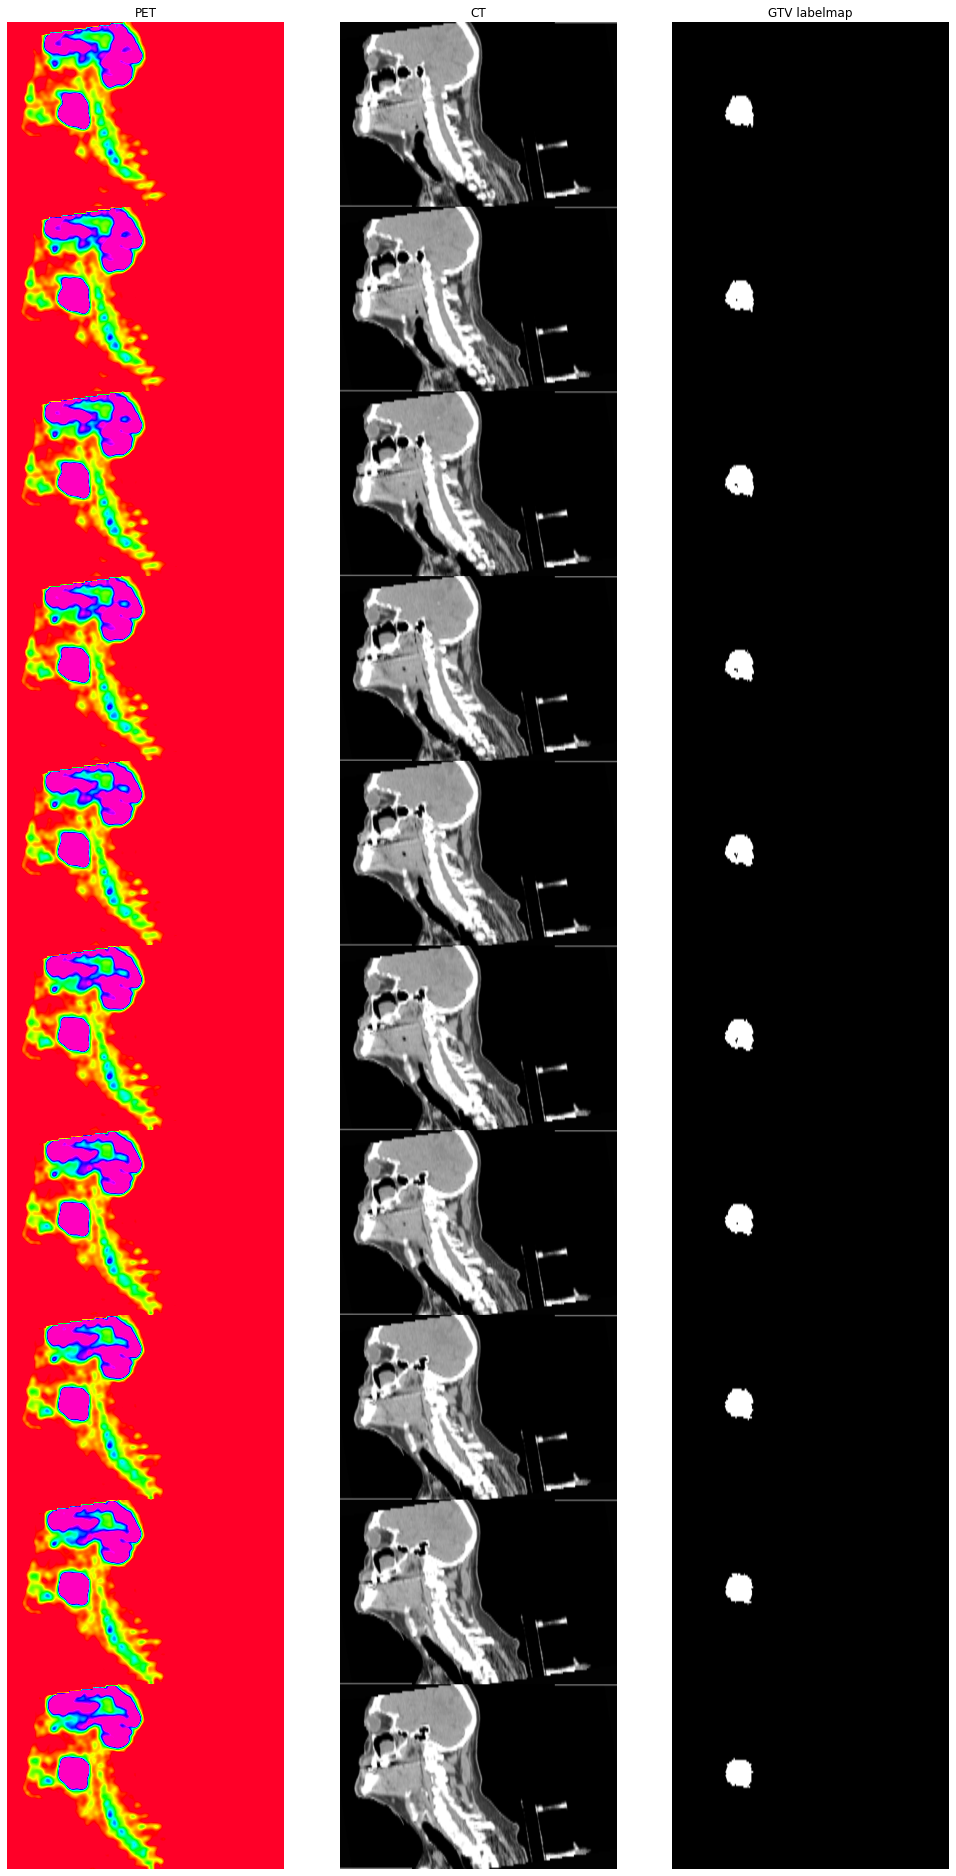

In [9]:
viz.multi_image_strips([PET_np, CT_np, GTV_labelmap_np],
                          modalities=['PET', 'CT', 'GTV labelmap'],
                          idx_range=[230, 240],
                          view='sagittal',
                          subtitles=[])

## 2 Testing the patch-based data loading pipeline

In [10]:
preprocessor = Preprocessor()
PET_CT_dataset = HECKTORPETCTDataset(data_dir, 
                                     patient_id_filepath, 
                                     mode='train',
                                     preprocessor=preprocessor,
                                     input_representation='separate volumes', 
                                     augment_data=False)

In [13]:
# Define the patch sampler and the patch queue
patch_sampler = PatchSampler(patch_size=(240,240,80)) # Use even numbers
patch_queue = PatchQueue(PET_CT_dataset, 
                         max_length=16, 
                         samples_per_volume=8, 
                         sampler=patch_sampler, 
                         num_workers=0, 
                         shuffle_subjects=True, 
                         shuffle_patches=True)

# Get sample 
patch_sample = patch_queue[0]
print(patch_sample.keys())
print(patch_sample['PET'].shape)

dict_keys(['PET', 'CT', 'GTV labelmap'])
torch.Size([1, 80, 240, 240])


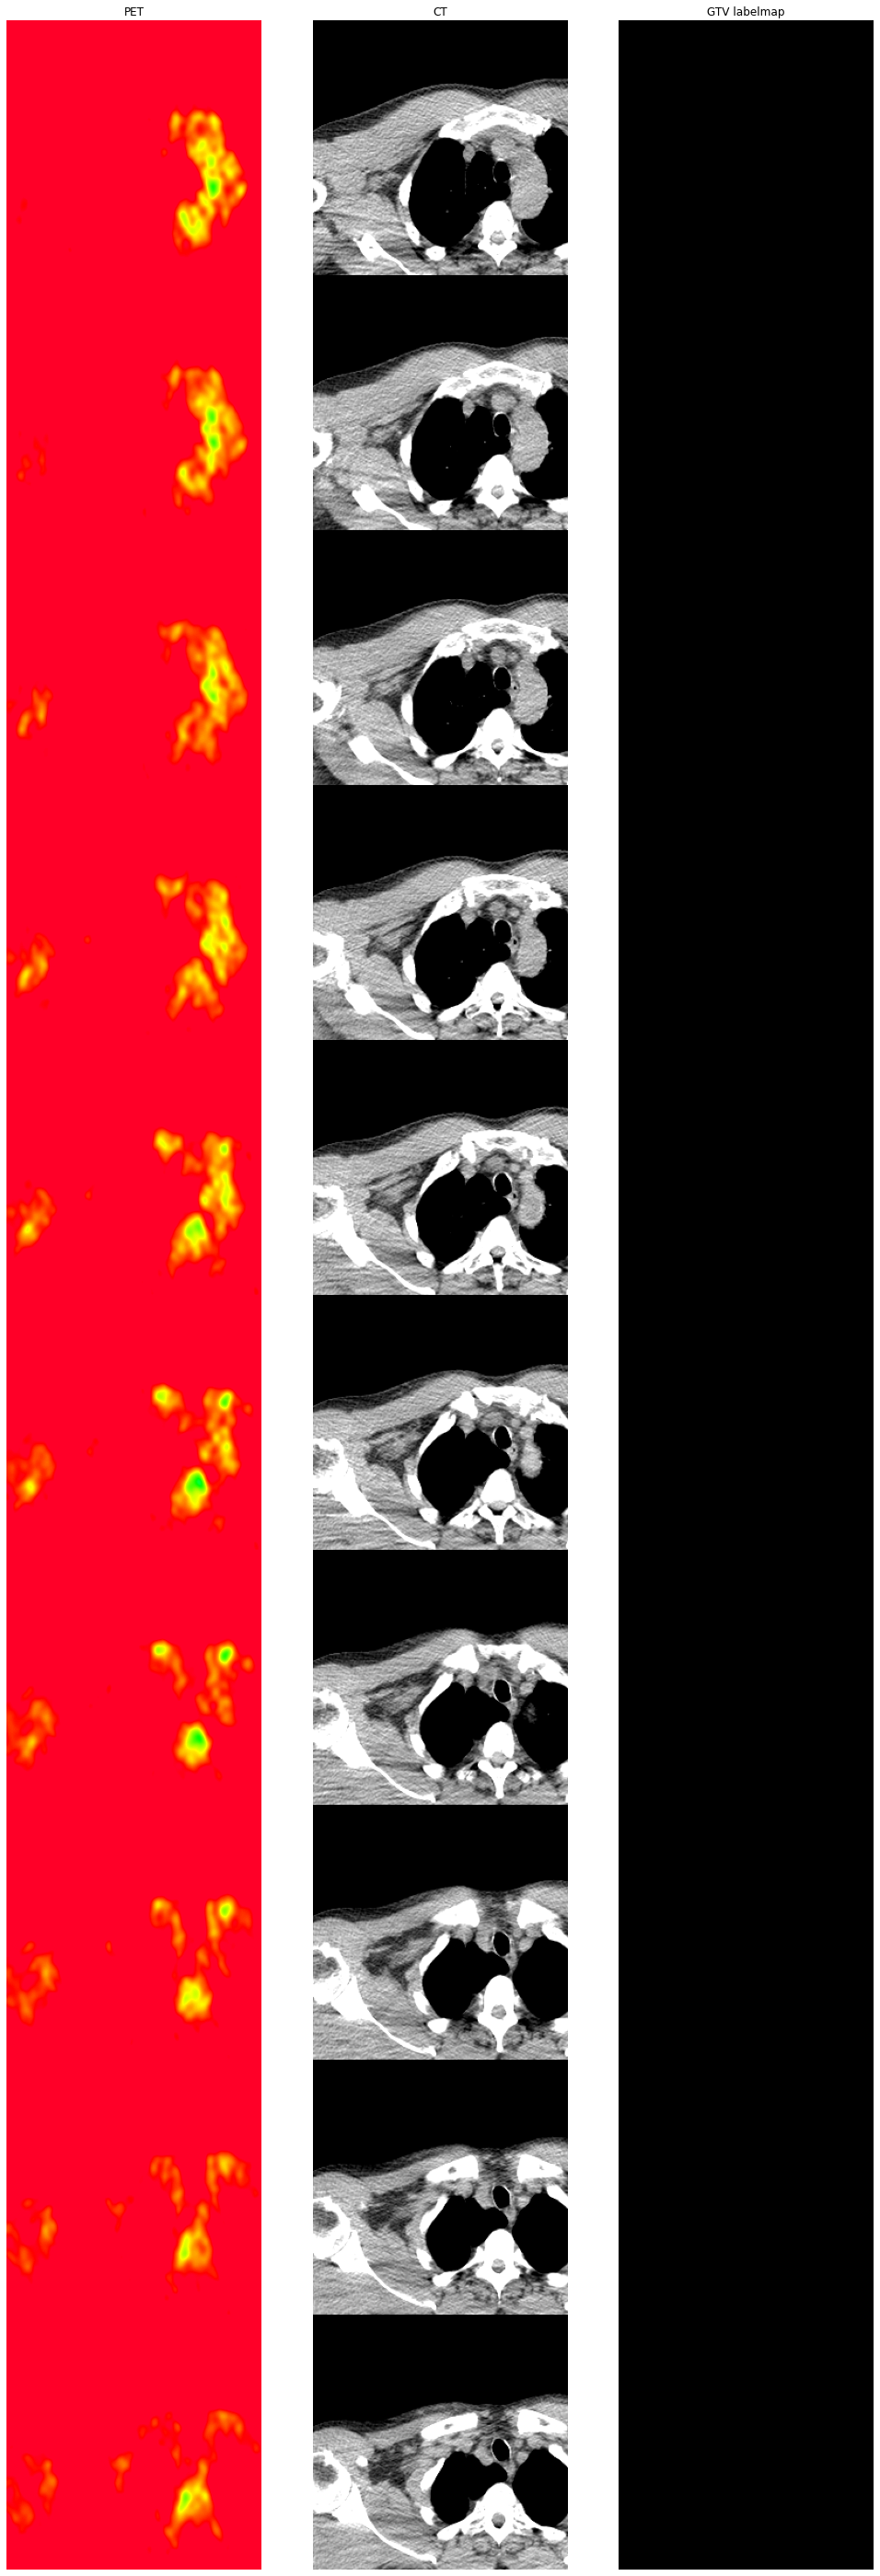

In [14]:
# Visualizing
PET_patch_np = patch_sample['PET'][0].permute(2,1,0).numpy()
CT_patch_np = patch_sample['CT'][0].permute(2,1,0).numpy()
GTV_labelmap_patch_np = patch_sample['GTV labelmap'].permute(2,1,0).numpy()

viz.multi_image_strips([PET_patch_np, CT_patch_np, GTV_labelmap_patch_np],
                          modalities=['PET', 'CT', 'GTV labelmap'],
                          idx_range=[0, 10],
                          view='axial',
                          subtitles=[])

## 3 Testing the patch loader

dict_keys(['PET', 'CT', 'GTV labelmap'])
torch.Size([4, 1, 80, 240, 240])


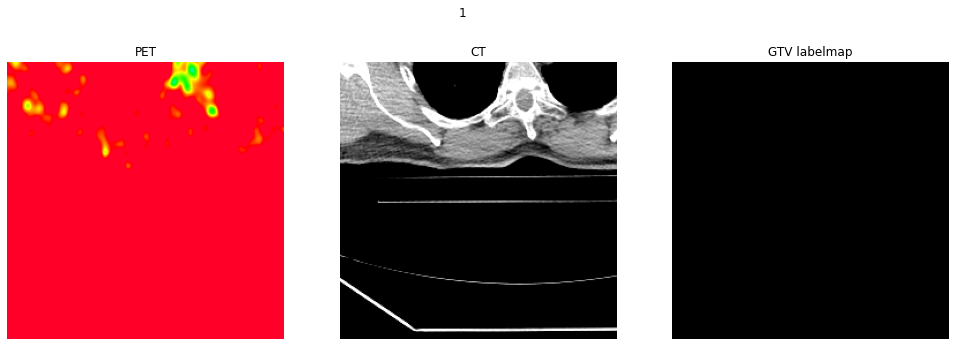

dict_keys(['PET', 'CT', 'GTV labelmap'])
torch.Size([4, 1, 80, 240, 240])


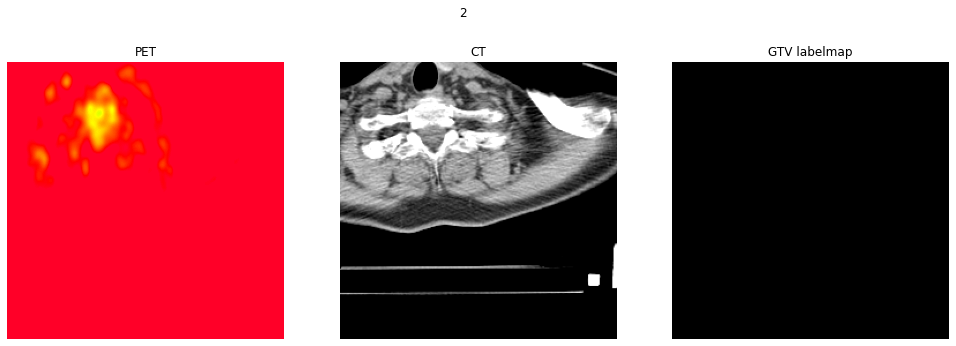

dict_keys(['PET', 'CT', 'GTV labelmap'])
torch.Size([4, 1, 80, 240, 240])


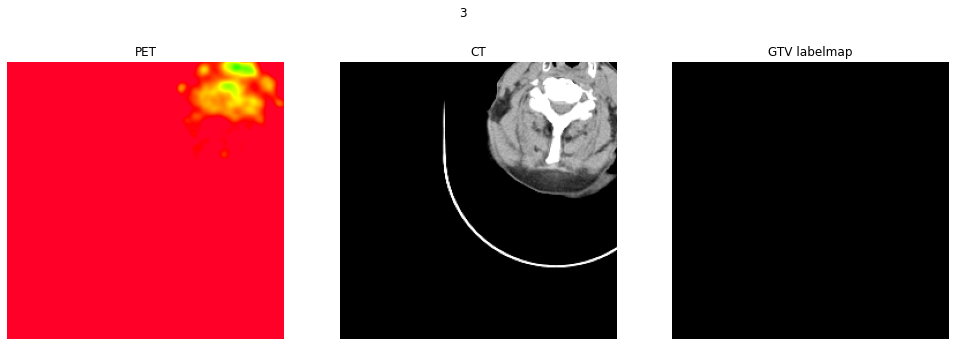

dict_keys(['PET', 'CT', 'GTV labelmap'])
torch.Size([4, 1, 80, 240, 240])


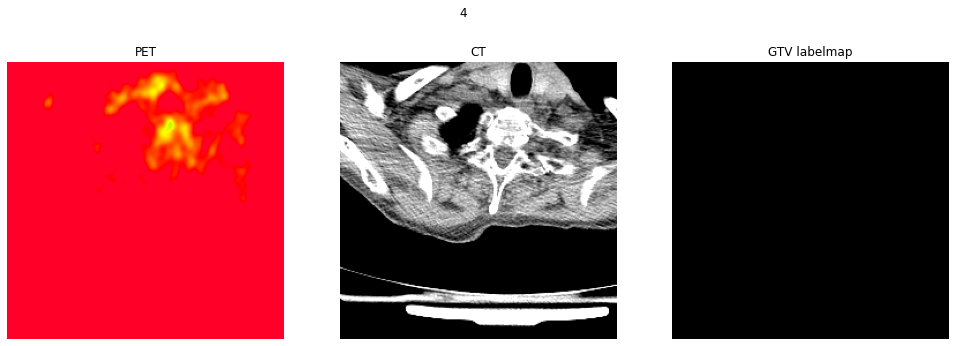

dict_keys(['PET', 'CT', 'GTV labelmap'])
torch.Size([4, 1, 80, 240, 240])


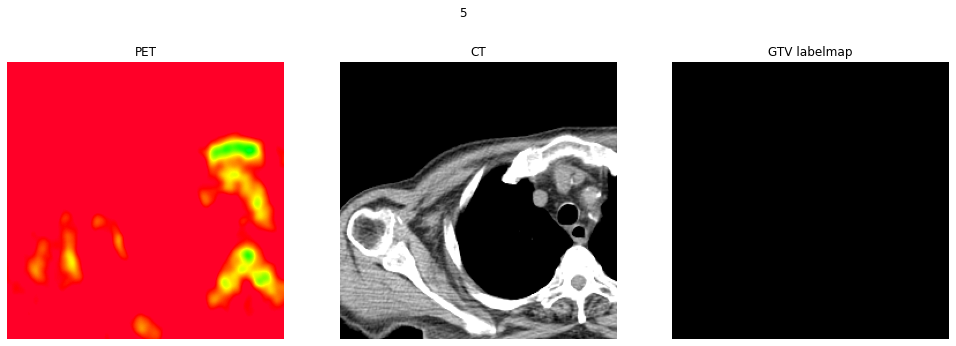

dict_keys(['PET', 'CT', 'GTV labelmap'])
torch.Size([4, 1, 80, 240, 240])


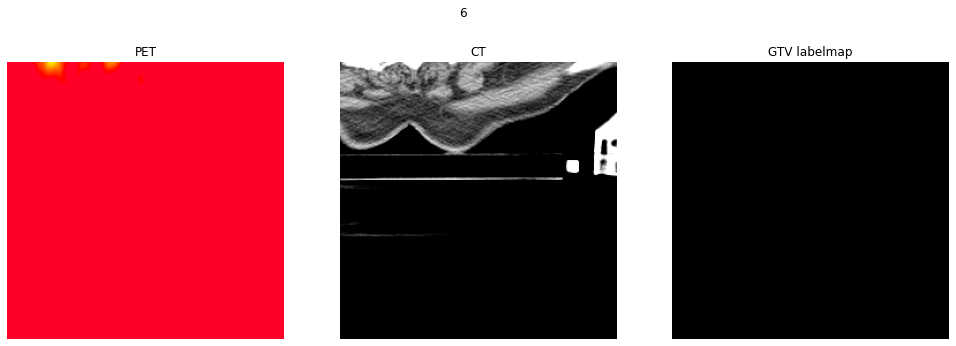

dict_keys(['PET', 'CT', 'GTV labelmap'])
torch.Size([4, 1, 80, 240, 240])


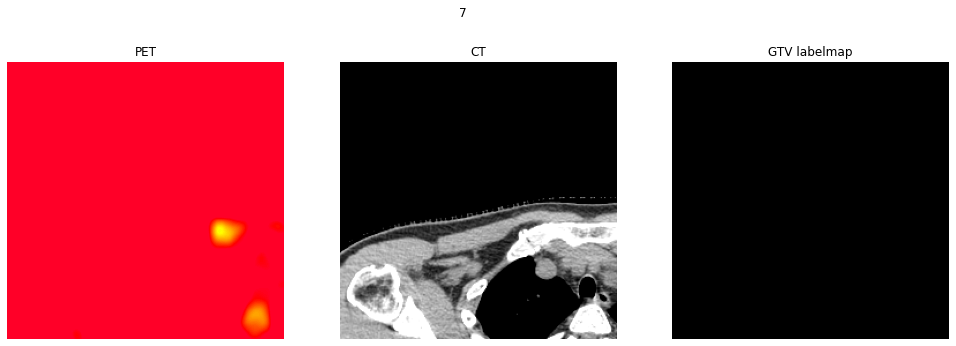

dict_keys(['PET', 'CT', 'GTV labelmap'])
torch.Size([4, 1, 80, 240, 240])


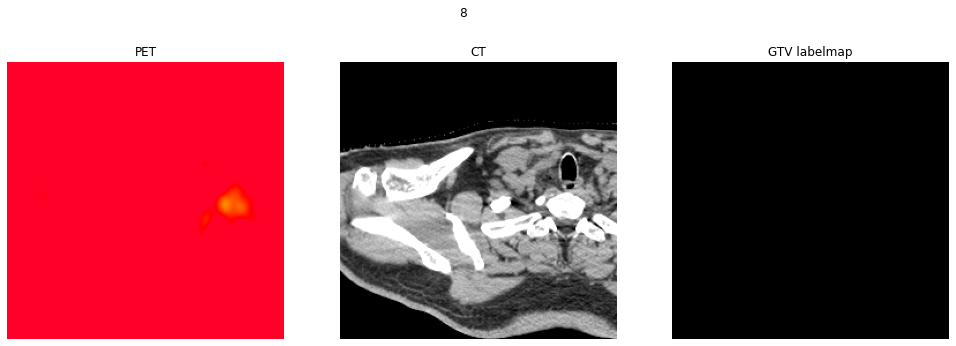

dict_keys(['PET', 'CT', 'GTV labelmap'])
torch.Size([4, 1, 80, 240, 240])


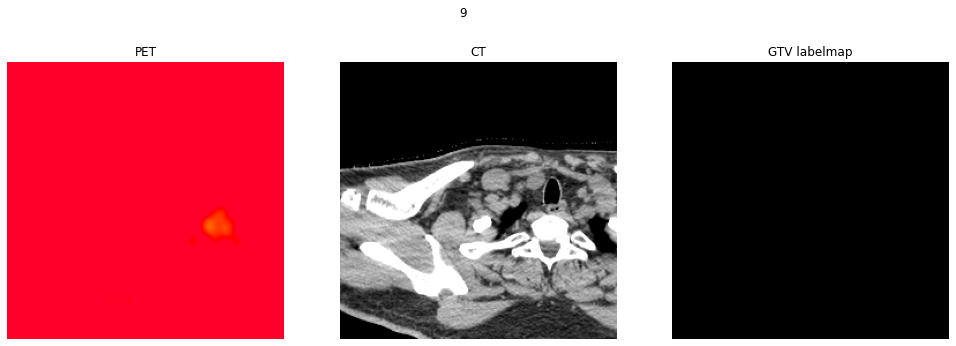

dict_keys(['PET', 'CT', 'GTV labelmap'])
torch.Size([4, 1, 80, 240, 240])


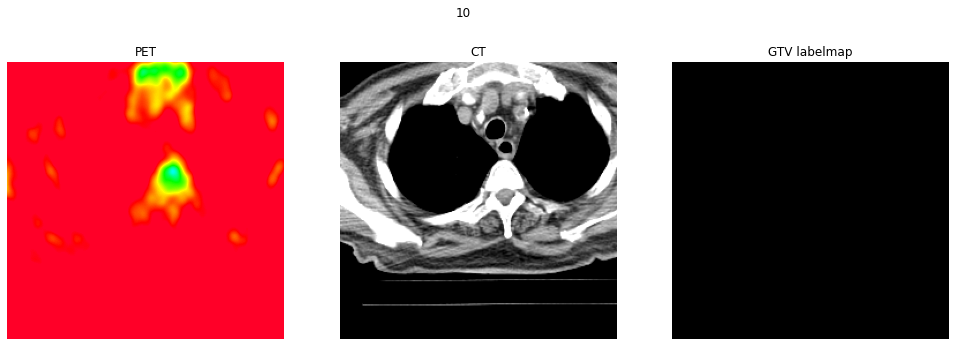

dict_keys(['PET', 'CT', 'GTV labelmap'])
torch.Size([4, 1, 80, 240, 240])


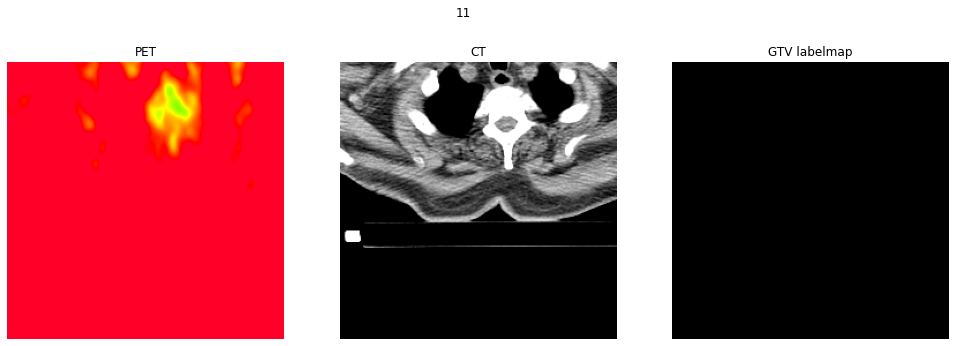

dict_keys(['PET', 'CT', 'GTV labelmap'])
torch.Size([4, 1, 80, 240, 240])


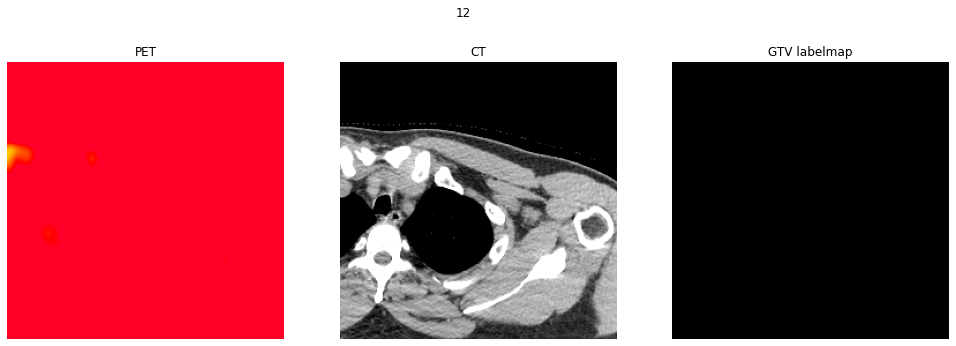

dict_keys(['PET', 'CT', 'GTV labelmap'])
torch.Size([4, 1, 80, 240, 240])


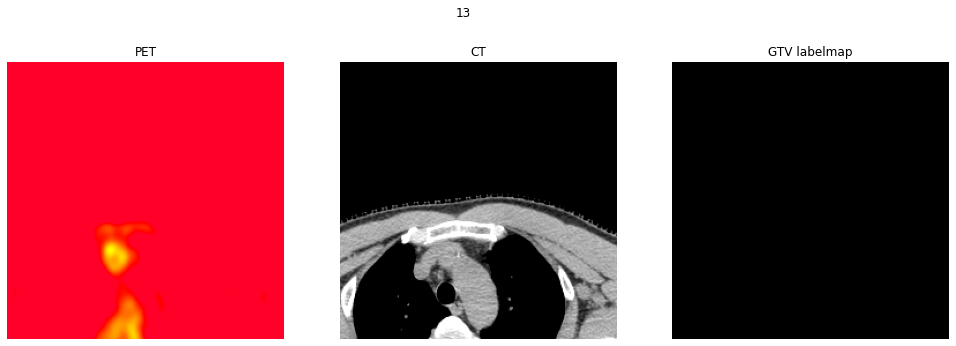

dict_keys(['PET', 'CT', 'GTV labelmap'])
torch.Size([4, 1, 80, 240, 240])


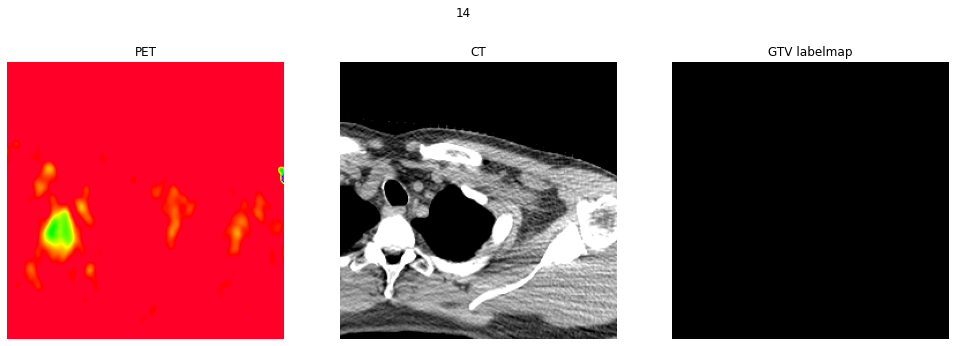

dict_keys(['PET', 'CT', 'GTV labelmap'])
torch.Size([4, 1, 80, 240, 240])


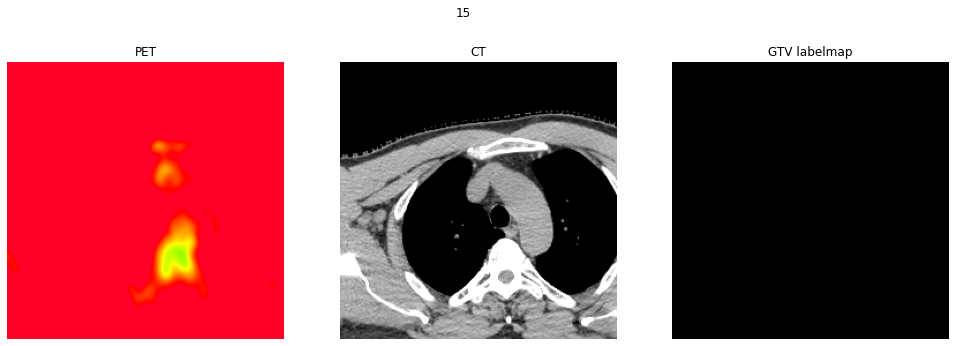

dict_keys(['PET', 'CT', 'GTV labelmap'])
torch.Size([4, 1, 80, 240, 240])


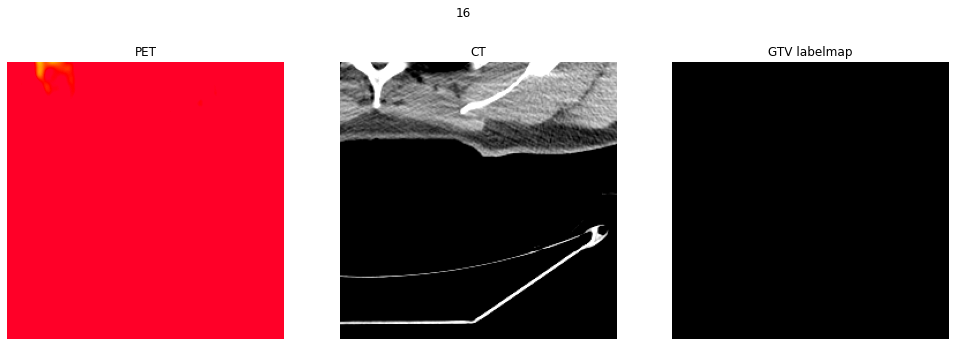

dict_keys(['PET', 'CT', 'GTV labelmap'])
torch.Size([4, 1, 80, 240, 240])


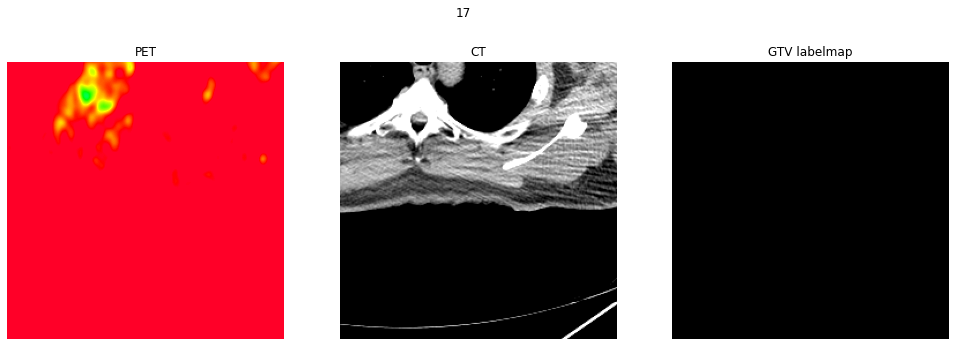

dict_keys(['PET', 'CT', 'GTV labelmap'])
torch.Size([4, 1, 80, 240, 240])


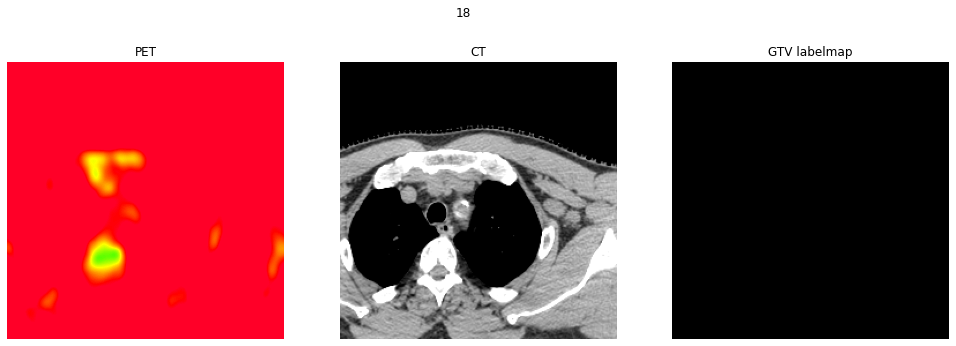

dict_keys(['PET', 'CT', 'GTV labelmap'])
torch.Size([4, 1, 80, 240, 240])


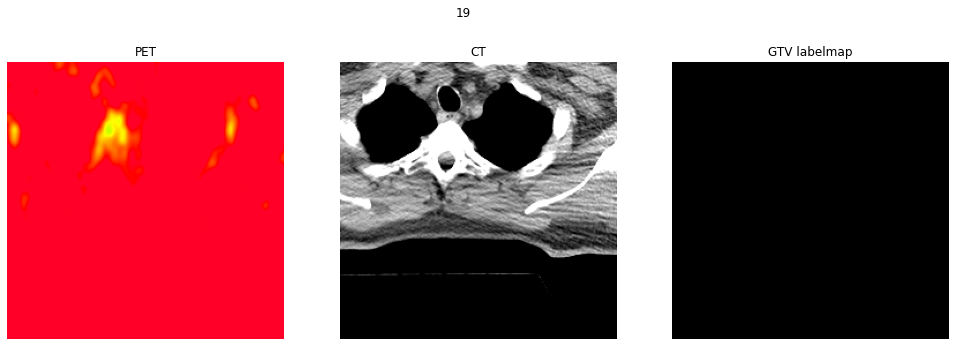

dict_keys(['PET', 'CT', 'GTV labelmap'])
torch.Size([4, 1, 80, 240, 240])


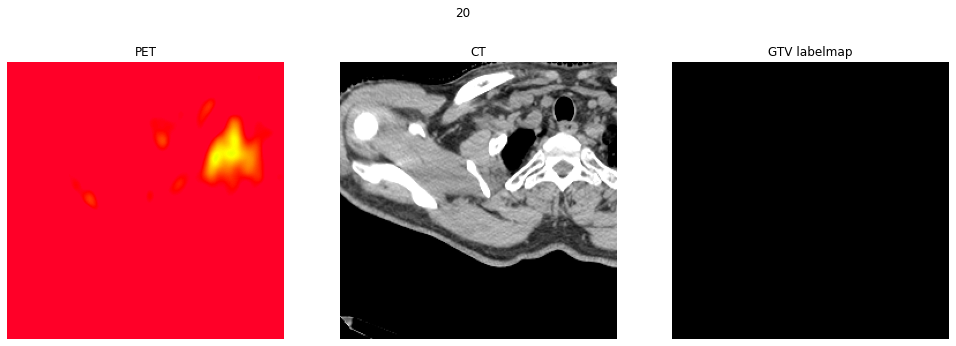

dict_keys(['PET', 'CT', 'GTV labelmap'])
torch.Size([4, 1, 80, 240, 240])


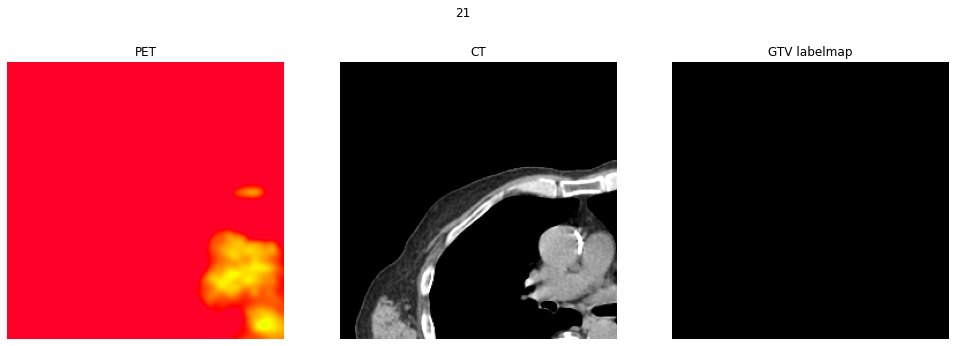

dict_keys(['PET', 'CT', 'GTV labelmap'])
torch.Size([4, 1, 80, 240, 240])


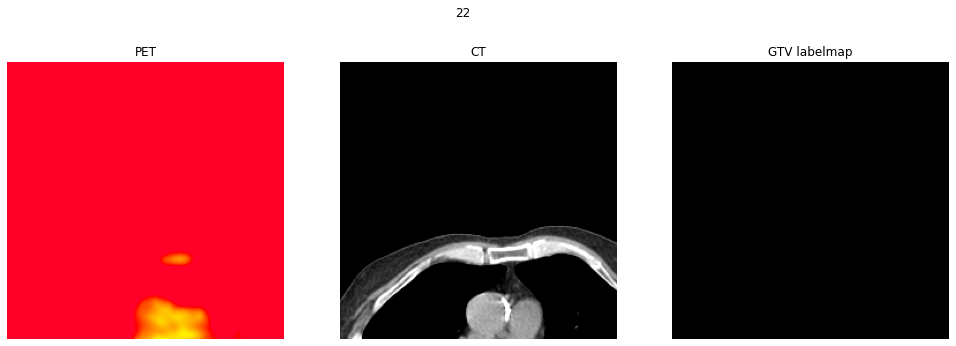

dict_keys(['PET', 'CT', 'GTV labelmap'])
torch.Size([4, 1, 80, 240, 240])


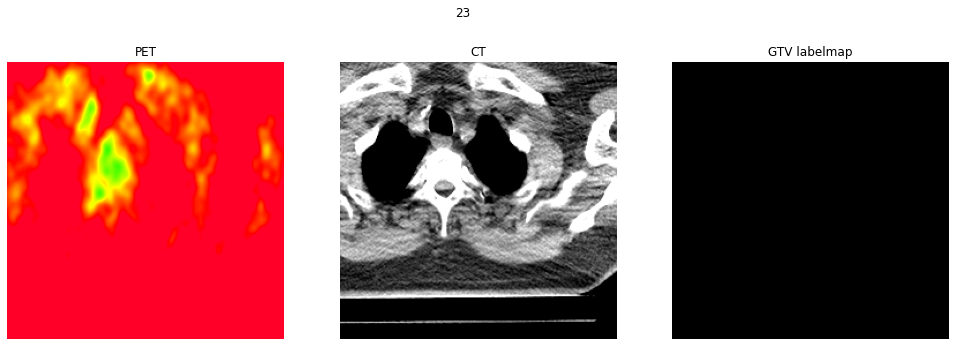

dict_keys(['PET', 'CT', 'GTV labelmap'])
torch.Size([4, 1, 80, 240, 240])


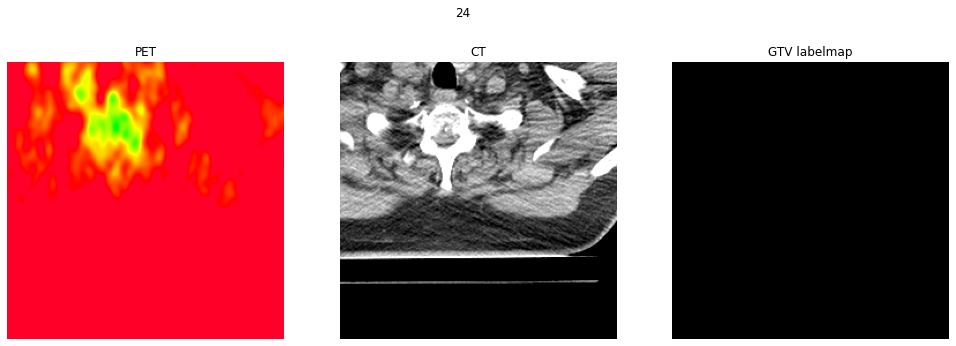

dict_keys(['PET', 'CT', 'GTV labelmap'])
torch.Size([4, 1, 80, 240, 240])


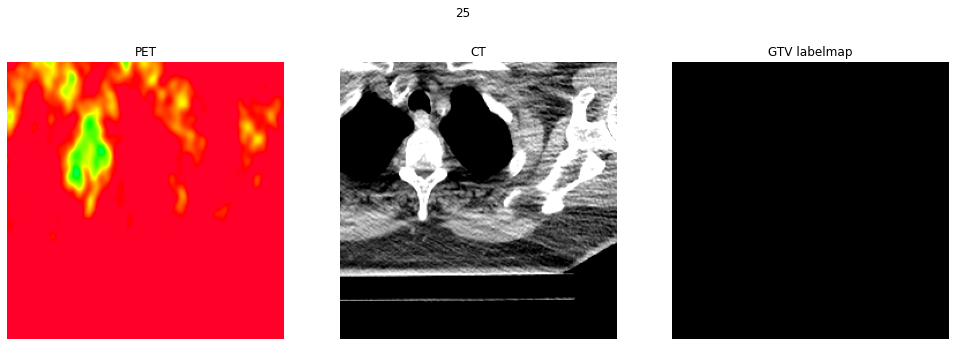

dict_keys(['PET', 'CT', 'GTV labelmap'])
torch.Size([4, 1, 80, 240, 240])


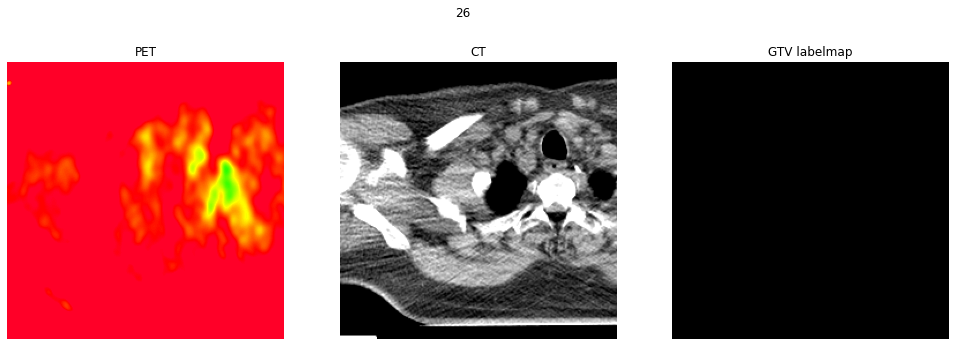

dict_keys(['PET', 'CT', 'GTV labelmap'])
torch.Size([4, 1, 80, 240, 240])


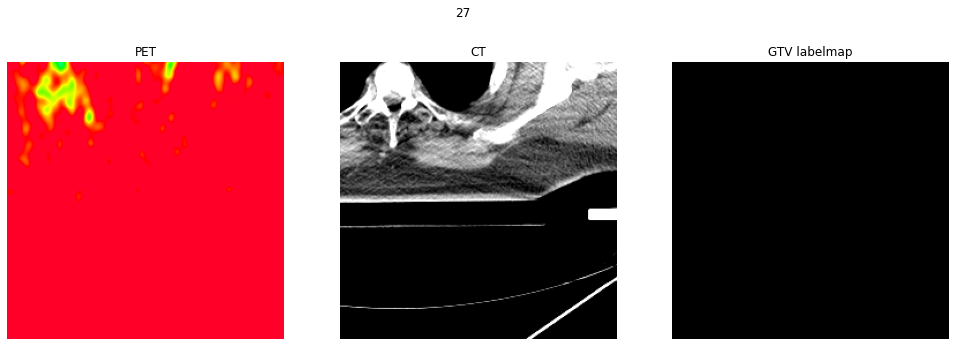

dict_keys(['PET', 'CT', 'GTV labelmap'])
torch.Size([4, 1, 80, 240, 240])


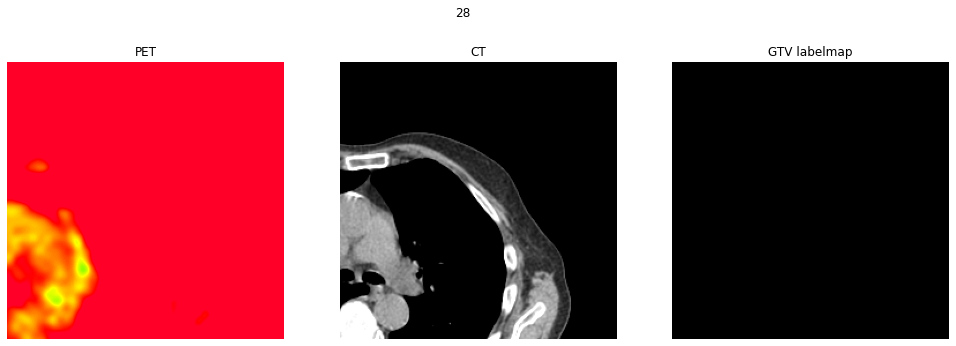

dict_keys(['PET', 'CT', 'GTV labelmap'])
torch.Size([4, 1, 80, 240, 240])


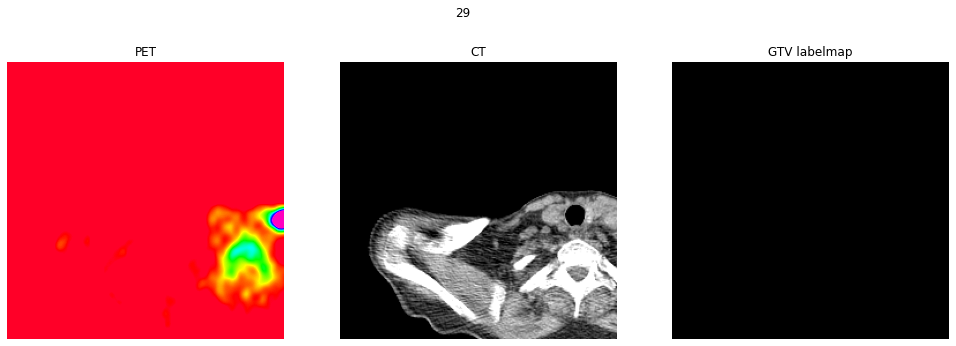

dict_keys(['PET', 'CT', 'GTV labelmap'])
torch.Size([4, 1, 80, 240, 240])


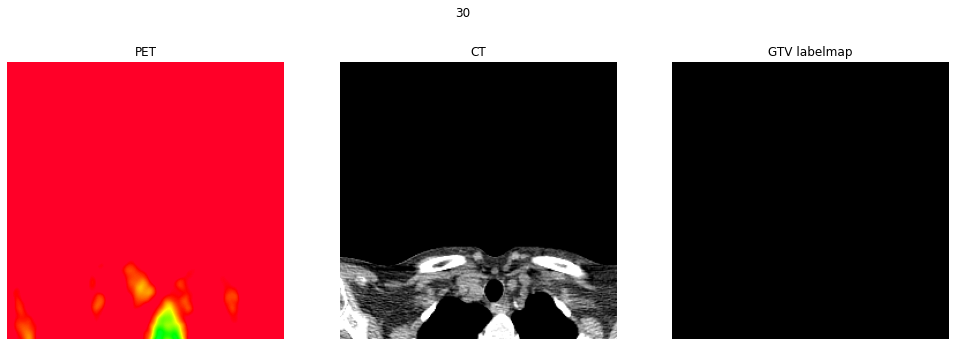

dict_keys(['PET', 'CT', 'GTV labelmap'])
torch.Size([4, 1, 80, 240, 240])


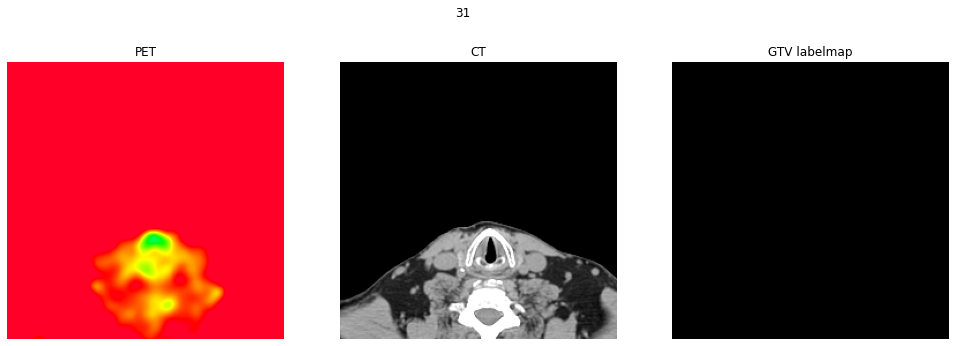

dict_keys(['PET', 'CT', 'GTV labelmap'])
torch.Size([4, 1, 80, 240, 240])


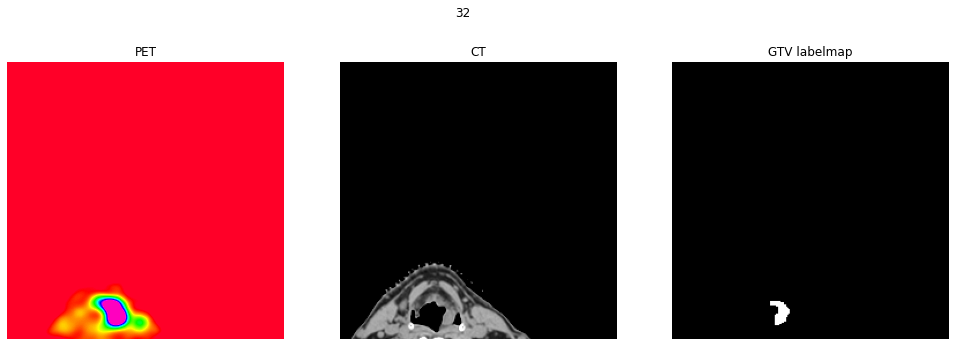

dict_keys(['PET', 'CT', 'GTV labelmap'])
torch.Size([4, 1, 80, 240, 240])


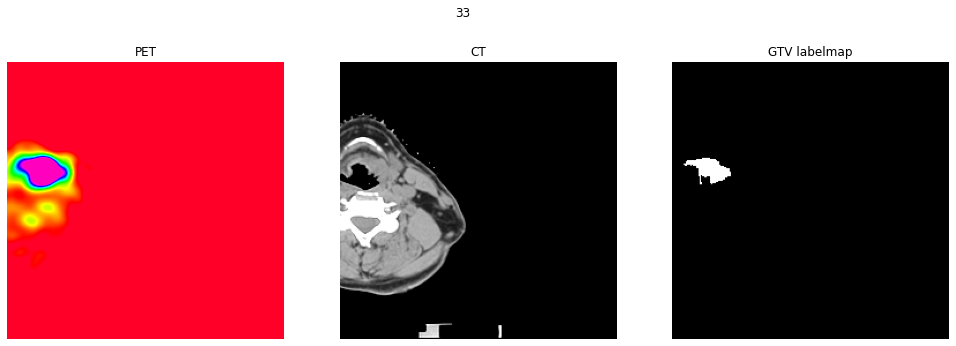

dict_keys(['PET', 'CT', 'GTV labelmap'])
torch.Size([4, 1, 80, 240, 240])


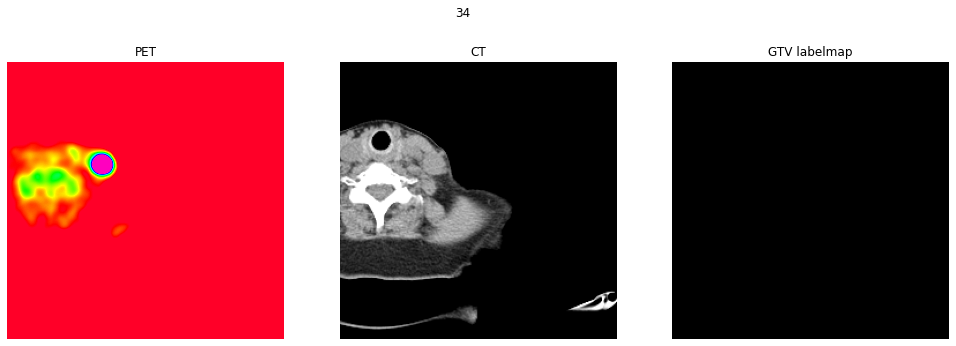

dict_keys(['PET', 'CT', 'GTV labelmap'])
torch.Size([4, 1, 80, 240, 240])


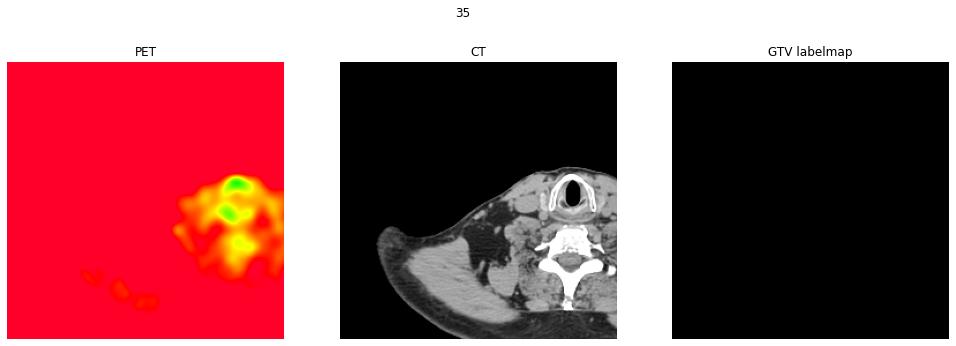

dict_keys(['PET', 'CT', 'GTV labelmap'])
torch.Size([4, 1, 80, 240, 240])


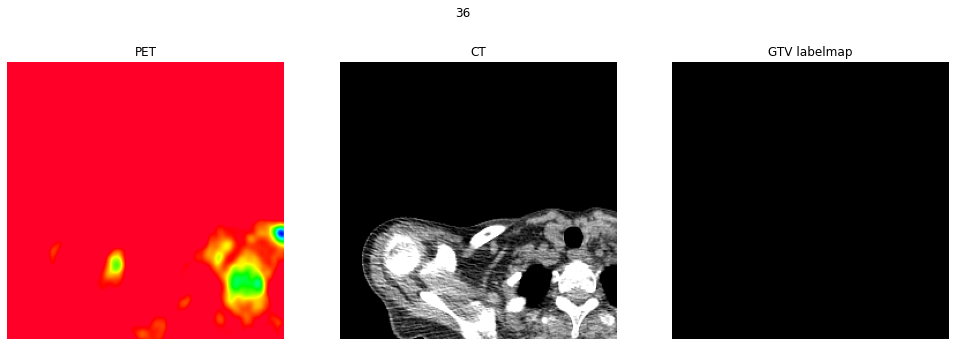

dict_keys(['PET', 'CT', 'GTV labelmap'])
torch.Size([4, 1, 80, 240, 240])


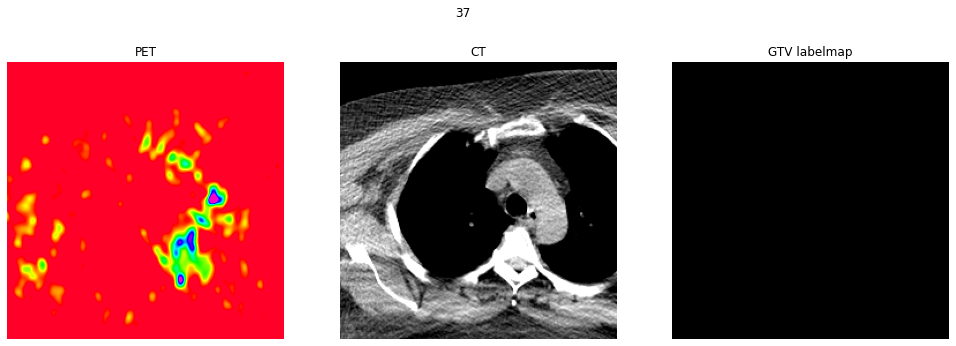

dict_keys(['PET', 'CT', 'GTV labelmap'])
torch.Size([4, 1, 80, 240, 240])


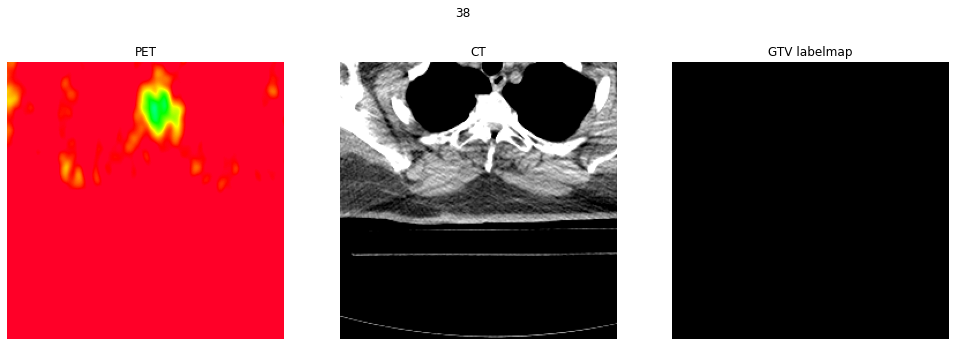

dict_keys(['PET', 'CT', 'GTV labelmap'])
torch.Size([4, 1, 80, 240, 240])


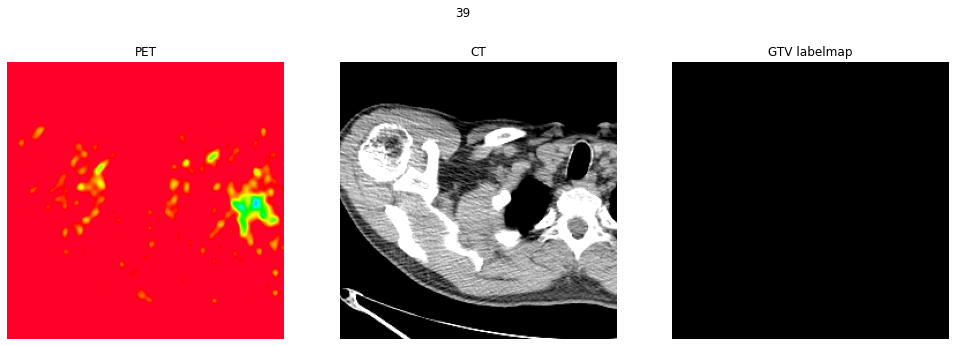

dict_keys(['PET', 'CT', 'GTV labelmap'])
torch.Size([4, 1, 80, 240, 240])


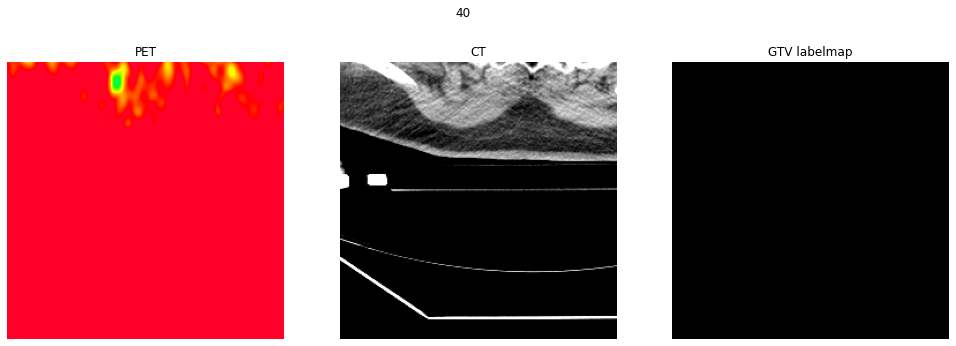

dict_keys(['PET', 'CT', 'GTV labelmap'])
torch.Size([4, 1, 80, 240, 240])


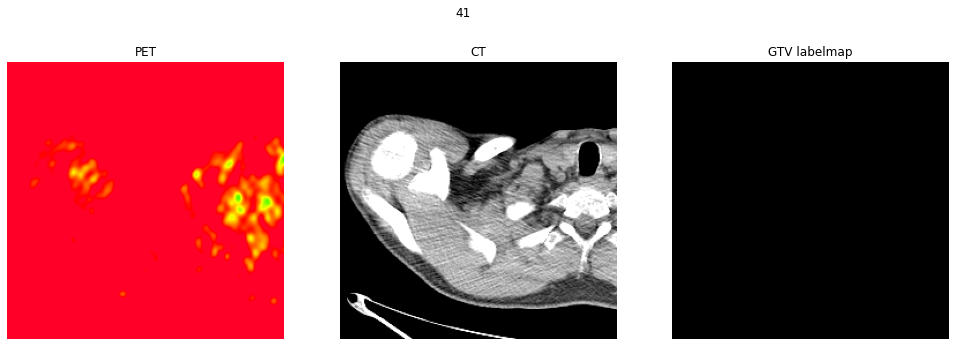

dict_keys(['PET', 'CT', 'GTV labelmap'])
torch.Size([4, 1, 80, 240, 240])


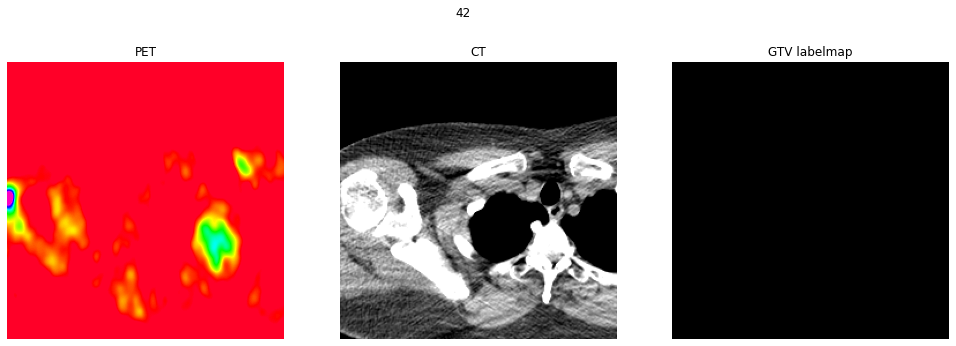

dict_keys(['PET', 'CT', 'GTV labelmap'])
torch.Size([4, 1, 80, 240, 240])


KeyboardInterrupt: 

In [20]:
patch_loader = DataLoader(patch_queue, batch_size=4)
for i, batch_of_patches in enumerate(patch_loader):
    print("Batch:", i+1)
    
    PET_patch_np = batch_of_patches['PET'][0][0].permute(2,1,0).numpy()
    CT_patch_np = batch_of_patches['CT'][0][0].permute(2,1,0).numpy()
    GTV_labelmap_patch_np = batch_of_patches['GTV labelmap'][0].permute(2,1,0).numpy()

    viz.multi_image_strips([PET_patch_np, CT_patch_np, GTV_labelmap_patch_np],
                              modalities=['PET', 'CT', 'GTV labelmap'],
                              idx_range=[0, 1],
                              view='axial',
                              subtitles=[],
                              title=str(i+1))